In [1]:
import pandas as pd

# Load dataset from the specified path
file_path = r"C:\Users\P.Carbon\Downloads\Project-Budget\Data3.csv"
df = pd.read_csv(file_path)
# Load data (assuming df is already loaded)
gdp = df['GDP'].values.astype(float)
years = df['Year'].values
print(df.head(2))
print(df.tail(2))

   Year  Budget   GDP
0  1972     786  4717
1  1973     995  6066
    Year  Budget      GDP
52  2024  797000  5597414
53  2025  790000  6244578


In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load dataset
file_path = r"C:\Users\P.Carbon\Downloads\Project-Budget\Data3.csv"
df = pd.read_csv(file_path)

gdp = df['GDP'].values.astype(float)
years = df['Year'].values

# Log transformation
log_gdp = np.log(gdp)

# Search ranges
p_range = range(0, 4)
d_range = range(0, 3)
q_range = range(0, 4)

results_list = []

# Loop through combinations
for p in p_range:
    for d in d_range:
        for q in q_range:
            try:
                model = ARIMA(log_gdp, order=(p, d, q))
                fitted = model.fit()
                
                # Calculate RMSE on in-sample fit
                rmse = np.sqrt(mean_squared_error(log_gdp, fitted.fittedvalues))
                
                results_list.append({
                    "order": (p, d, q),
                    "AIC": fitted.aic,
                    "BIC": fitted.bic,
                    "RMSE": rmse
                })
            except:
                continue

# Convert to DataFrame and sort
results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values(by="AIC").reset_index(drop=True)

# Top 5 models
top_5 = results_df.head(5)
print("\nTop 5 ARIMA models:")
print(top_5)


c:\Users\P.Carbon\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\P.Carbon\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\P.Carbon\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\P.Carbon\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zero


Top 5 ARIMA models:
       order        AIC       BIC      RMSE
0  (0, 2, 3) -14.231493 -6.426518  1.289116
1  (1, 1, 3) -12.951804 -3.100344  1.169760
2  (1, 2, 3) -12.759824 -3.003605  1.289213
3  (2, 2, 1) -11.875282 -4.070307  1.289642
4  (3, 1, 1) -11.050417 -1.198957  1.169953


In [6]:
# Fit ARIMA(0,2,3)
model = ARIMA(log_gdp, order=(0, 2, 3))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   54
Model:                 ARIMA(0, 2, 3)   Log Likelihood                  11.116
Date:                Fri, 11 Jul 2025   AIC                            -14.231
Time:                        07:16:12   BIC                             -6.427
Sample:                             0   HQIC                           -11.239
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0641      0.177     -6.020      0.000      -1.410      -0.718
ma.L2         -0.3878      0.189     -2.048      0.041      -0.759      -0.017
ma.L3          0.5798      0.137      4.226      0.0

In [2]:
import pandas as pd
import numpy as np
import random
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Suppress warnings
warnings.filterwarnings("ignore")

# Set random seed for reproducibility
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)

# Load data (assuming df is already loaded)
gdp = df['GDP'].values.astype(float)
years = df['Year'].values

# Train/test split
train_size = int(len(gdp) * 0.80)
gdp_train = gdp[:train_size]
gdp_test = gdp[train_size:]

# Define MAPE and Accuracy
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define ARIMA orders grid
arima_orders = [(p, d, q) for p in range(0, 4) for d in range(0, 3) for q in range(0, 4)]

# Store results
results = []

# Loop through each ARIMA(p,d,q)
for order in arima_orders:
    try:
        model = ARIMA(gdp_train, order=order).fit()
        pred = model.predict(start=train_size, end=len(gdp)-1)

        # Evaluation metrics
        rmse = np.sqrt(mean_squared_error(gdp_test, pred))
        mae = mean_absolute_error(gdp_test, pred)
        mape_val = mape(gdp_test, pred)
        accuracy = 100 - mape_val  # approximate accuracy
        r2 = r2_score(gdp_test, pred)

        results.append({
            'ARIMA_Order': order,
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape_val,
            'Accuracy (%)': accuracy,
            'R2': r2
        })

    except Exception as e:
        continue  # skip models that fail to fit

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Find best model by RMSE
best_arima = results_df.sort_values('RMSE').head(1)

# Print the best model
print("\n✅ Best ARIMA Model for GDP Based on Test RMSE:")
print(best_arima.round(4))



✅ Best ARIMA Model for GDP Based on Test RMSE:
   ARIMA_Order          RMSE          MAE     MAPE  Accuracy (%)      R2
22   (1, 2, 2)  1.150938e+06  923744.9868  22.5269       77.4731  0.3837


In [3]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Suppress warnings
warnings.filterwarnings("ignore")

# Set random seeds
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Load data
gdp = df['GDP'].values.astype(float)

# Train/test split
train_size = int(len(gdp) * 0.8)
gdp_train = gdp[:train_size]
gdp_test = gdp[train_size:]

# Scale data
scaler = MinMaxScaler()
gdp_scaled = scaler.fit_transform(gdp.reshape(-1, 1))

# Sequence generation function
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Evaluation metric
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Hyperparameter grid
time_steps_list = [3, 4, 5]
units_list = [8, 16, 32, 64]
dropout_rates = [0.1, 0.2, 0.3]
batch_sizes = [8, 16]

results = []

for time_steps in time_steps_list:
    X, y = create_sequences(gdp_scaled, time_steps)
    X_train, X_test = X[:train_size-time_steps], X[train_size-time_steps:]
    y_train, y_test = y[:train_size-time_steps], y[train_size-time_steps:]

    for units in units_list:
        for dropout_rate in dropout_rates:
            for batch_size in batch_sizes:

                model = Sequential([
                    LSTM(units, activation='tanh', return_sequences=True, input_shape=(time_steps, 1)),
                    Dropout(dropout_rate),
                    LSTM(units, activation='tanh'),
                    Dropout(dropout_rate),
                    Dense(1)
                ])

                model.compile(optimizer='adam', loss='mse')
                early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

                model.fit(X_train, y_train, epochs=50, batch_size=batch_size,
                          validation_split=0.1, callbacks=[early_stop], verbose=0)

                y_pred_scaled = model.predict(X_test)
                y_pred = scaler.inverse_transform(y_pred_scaled).flatten()
                y_true = scaler.inverse_transform(y_test).flatten()

                rmse = np.sqrt(mean_squared_error(y_true, y_pred))
                mae = np.log10(mean_absolute_error(y_true, y_pred))
                mape_val = np.log10(mape(y_true, y_pred))
                accuracy = 100 - mape(y_true, y_pred)  # accuracy based on original MAPE
                r2 = r2_score(y_true, y_pred)


                results.append({
                    'Model': 'LSTM',
                    'time_steps': time_steps,
                    'units': units,
                    'dropout': dropout_rate,
                    'batch_size': batch_size,
                    'RMSE': rmse,
                    'MAE': mae,
                    'MAPE': mape_val,
                    'Accuracy (%)': accuracy,
                    'R2': r2
                })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Sort and show the best model
best_lstm = results_df.sort_values('RMSE').head(1)

print("\n✅ Best LSTM Model for GDP Based on Test RMSE:")
print(best_lstm.round(4))


1/1 [==============================] - 8s 8s/step

✅ Best LSTM Model for GDP Based on Test RMSE:
   Model  time_steps  units  dropout  batch_size         RMSE     MAE    MAPE  \
71  LSTM           5     64      0.3          16  165457.3762  5.1442  0.6834   

    Accuracy (%)      R2  
71       95.1759  0.9873  


Epoch 1/100
3/3 [==============================] - 39s 3s/step - loss: 0.0016 - val_loss: 0.0228
Epoch 2/100
3/3 [==============================] - 0s 141ms/step - loss: 0.0010 - val_loss: 0.0171
Epoch 3/100
3/3 [==============================] - 0s 158ms/step - loss: 9.8498e-04 - val_loss: 0.0155
Epoch 4/100
3/3 [==============================] - 0s 135ms/step - loss: 0.0011 - val_loss: 0.0159
Epoch 5/100
3/3 [==============================] - 0s 141ms/step - loss: 9.5384e-04 - val_loss: 0.0164
Epoch 6/100
3/3 [==============================] - 0s 198ms/step - loss: 8.4817e-04 - val_loss: 0.0161
Epoch 7/100
3/3 [==============================] - 0s 171ms/step - loss: 8.2152e-04 - val_loss: 0.0160
Epoch 8/100
3/3 [==============================] - 0s 160ms/step - loss: 7.7538e-04 - val_loss: 0.0155
Epoch 9/100
3/3 [==============================] - 0s 160ms/step - loss: 7.9651e-04 - val_loss: 0.0153
Epoch 10/100
3/3 [==============================] - 0s 167ms/step - loss: 7.6677e-04 - 

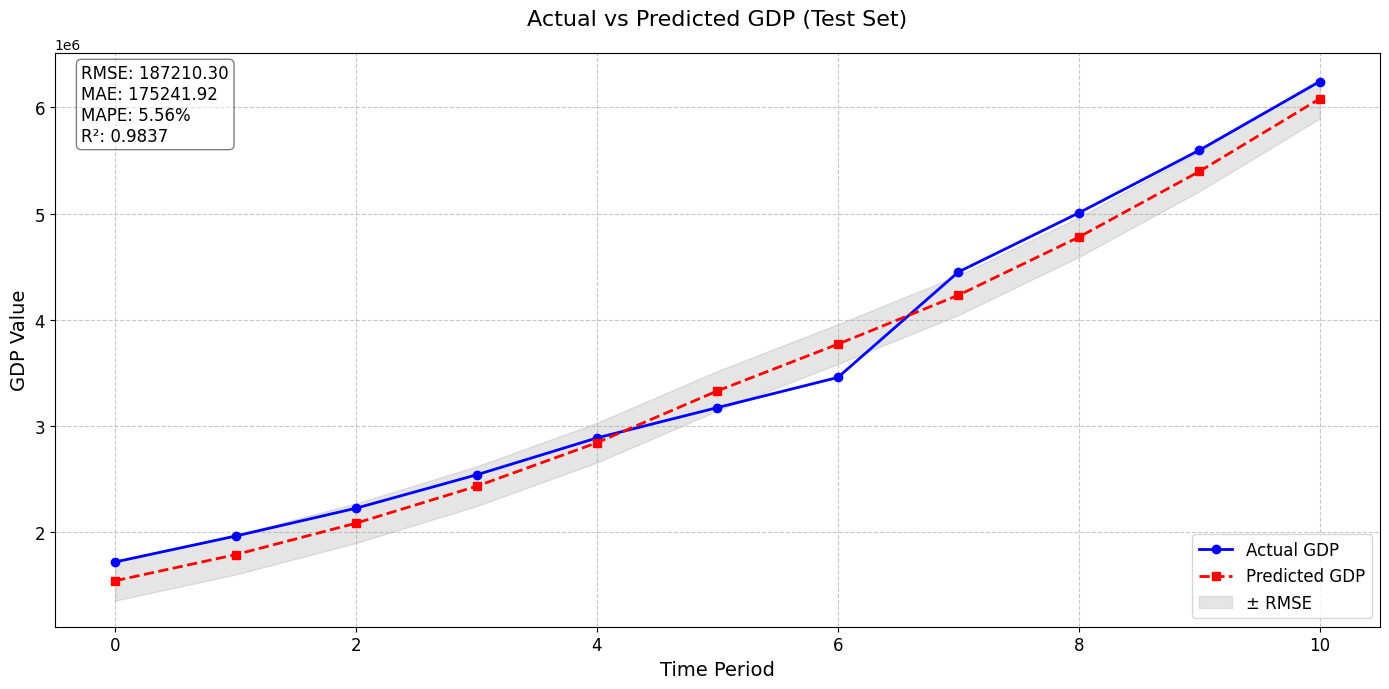

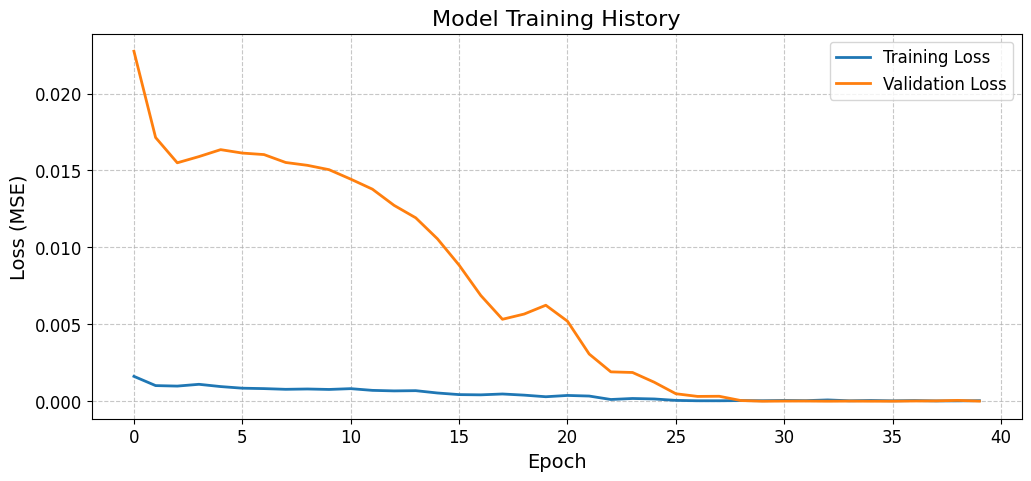

In [ ]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Suppress warnings
warnings.filterwarnings("ignore")

# Set random seeds for reproducibility
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Load dataset from the specified path
file_path = r"C:\Users\P.Carbon\Downloads\Project-Budget\Data3.csv"
df = pd.read_csv(file_path)
# Load data (assuming df is already loaded)
gdp = df['GDP'].values.astype(float)
years = df['Year'].values


# Train/test split
train_size = int(len(gdp) * 0.8)
gdp_train = gdp[:train_size]
gdp_test = gdp[train_size:]

# Scale data
scaler = MinMaxScaler()
gdp_scaled = scaler.fit_transform(gdp.reshape(-1, 1))

# Sequence generation function
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Evaluation metric
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Best parameters from your results
best_time_steps = 5
best_units = 32
best_dropout = 0.2
best_batch_size = 16

# Create sequences with best time steps
X, y = create_sequences(gdp_scaled, best_time_steps)
X_train, X_test = X[:train_size-best_time_steps], X[train_size-best_time_steps:]
y_train, y_test = y[:train_size-best_time_steps], y[train_size-best_time_steps:]

# Build best model
best_model = Sequential([
    LSTM(best_units, activation='tanh', return_sequences=True, 
         input_shape=(best_time_steps, 1)),
    Dropout(best_dropout),
    LSTM(best_units, activation='tanh'),
    Dropout(best_dropout),
    Dense(1)
])

best_model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = best_model.fit(
    X_train, y_train, 
    epochs=100, 
    batch_size=best_batch_size,
    validation_split=0.1, 
    callbacks=[early_stop], 
    verbose=1
)

# Generate predictions
y_pred_scaled = best_model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled).flatten()
y_true = scaler.inverse_transform(y_test).flatten()

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape_val = mape(y_true, y_pred)
accuracy = 100 - mape_val
r2 = r2_score(y_true, y_pred)

print("\n✅ Best Model Performance on Test Set:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape_val:.4f}%")
print(f"Accuracy: {accuracy:.4f}%")
print(f"R2 Score: {r2:.4f}")

# Create time index for test set
time_index = range(len(y_true))

# Plot actual vs predicted with improved styling
plt.figure(figsize=(14, 7))
plt.plot(time_index, y_true, 'b-', linewidth=2, marker='o', markersize=6, label='Actual GDP')
plt.plot(time_index, y_pred, 'r--', linewidth=2, marker='s', markersize=6, label='Predicted GDP')

# Add error shading
plt.fill_between(time_index, 
                 y_pred - rmse, 
                 y_pred + rmse, 
                 color='gray', alpha=0.2, label='± RMSE')

plt.title('Actual vs Predicted GDP (Test Set)', fontsize=16, pad=20)
plt.xlabel('Time Period', fontsize=14)
plt.ylabel('GDP Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add metrics to plot
textstr = '\n'.join((
    f'RMSE: {rmse:.2f}',
    f'MAE: {mae:.2f}',
    f'MAPE: {mape_val:.2f}%',
    f'R²: {r2:.4f}'))
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=props, fontsize=12)

plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Training History', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss (MSE)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

1/1 [==============================] - 0s 128ms/step


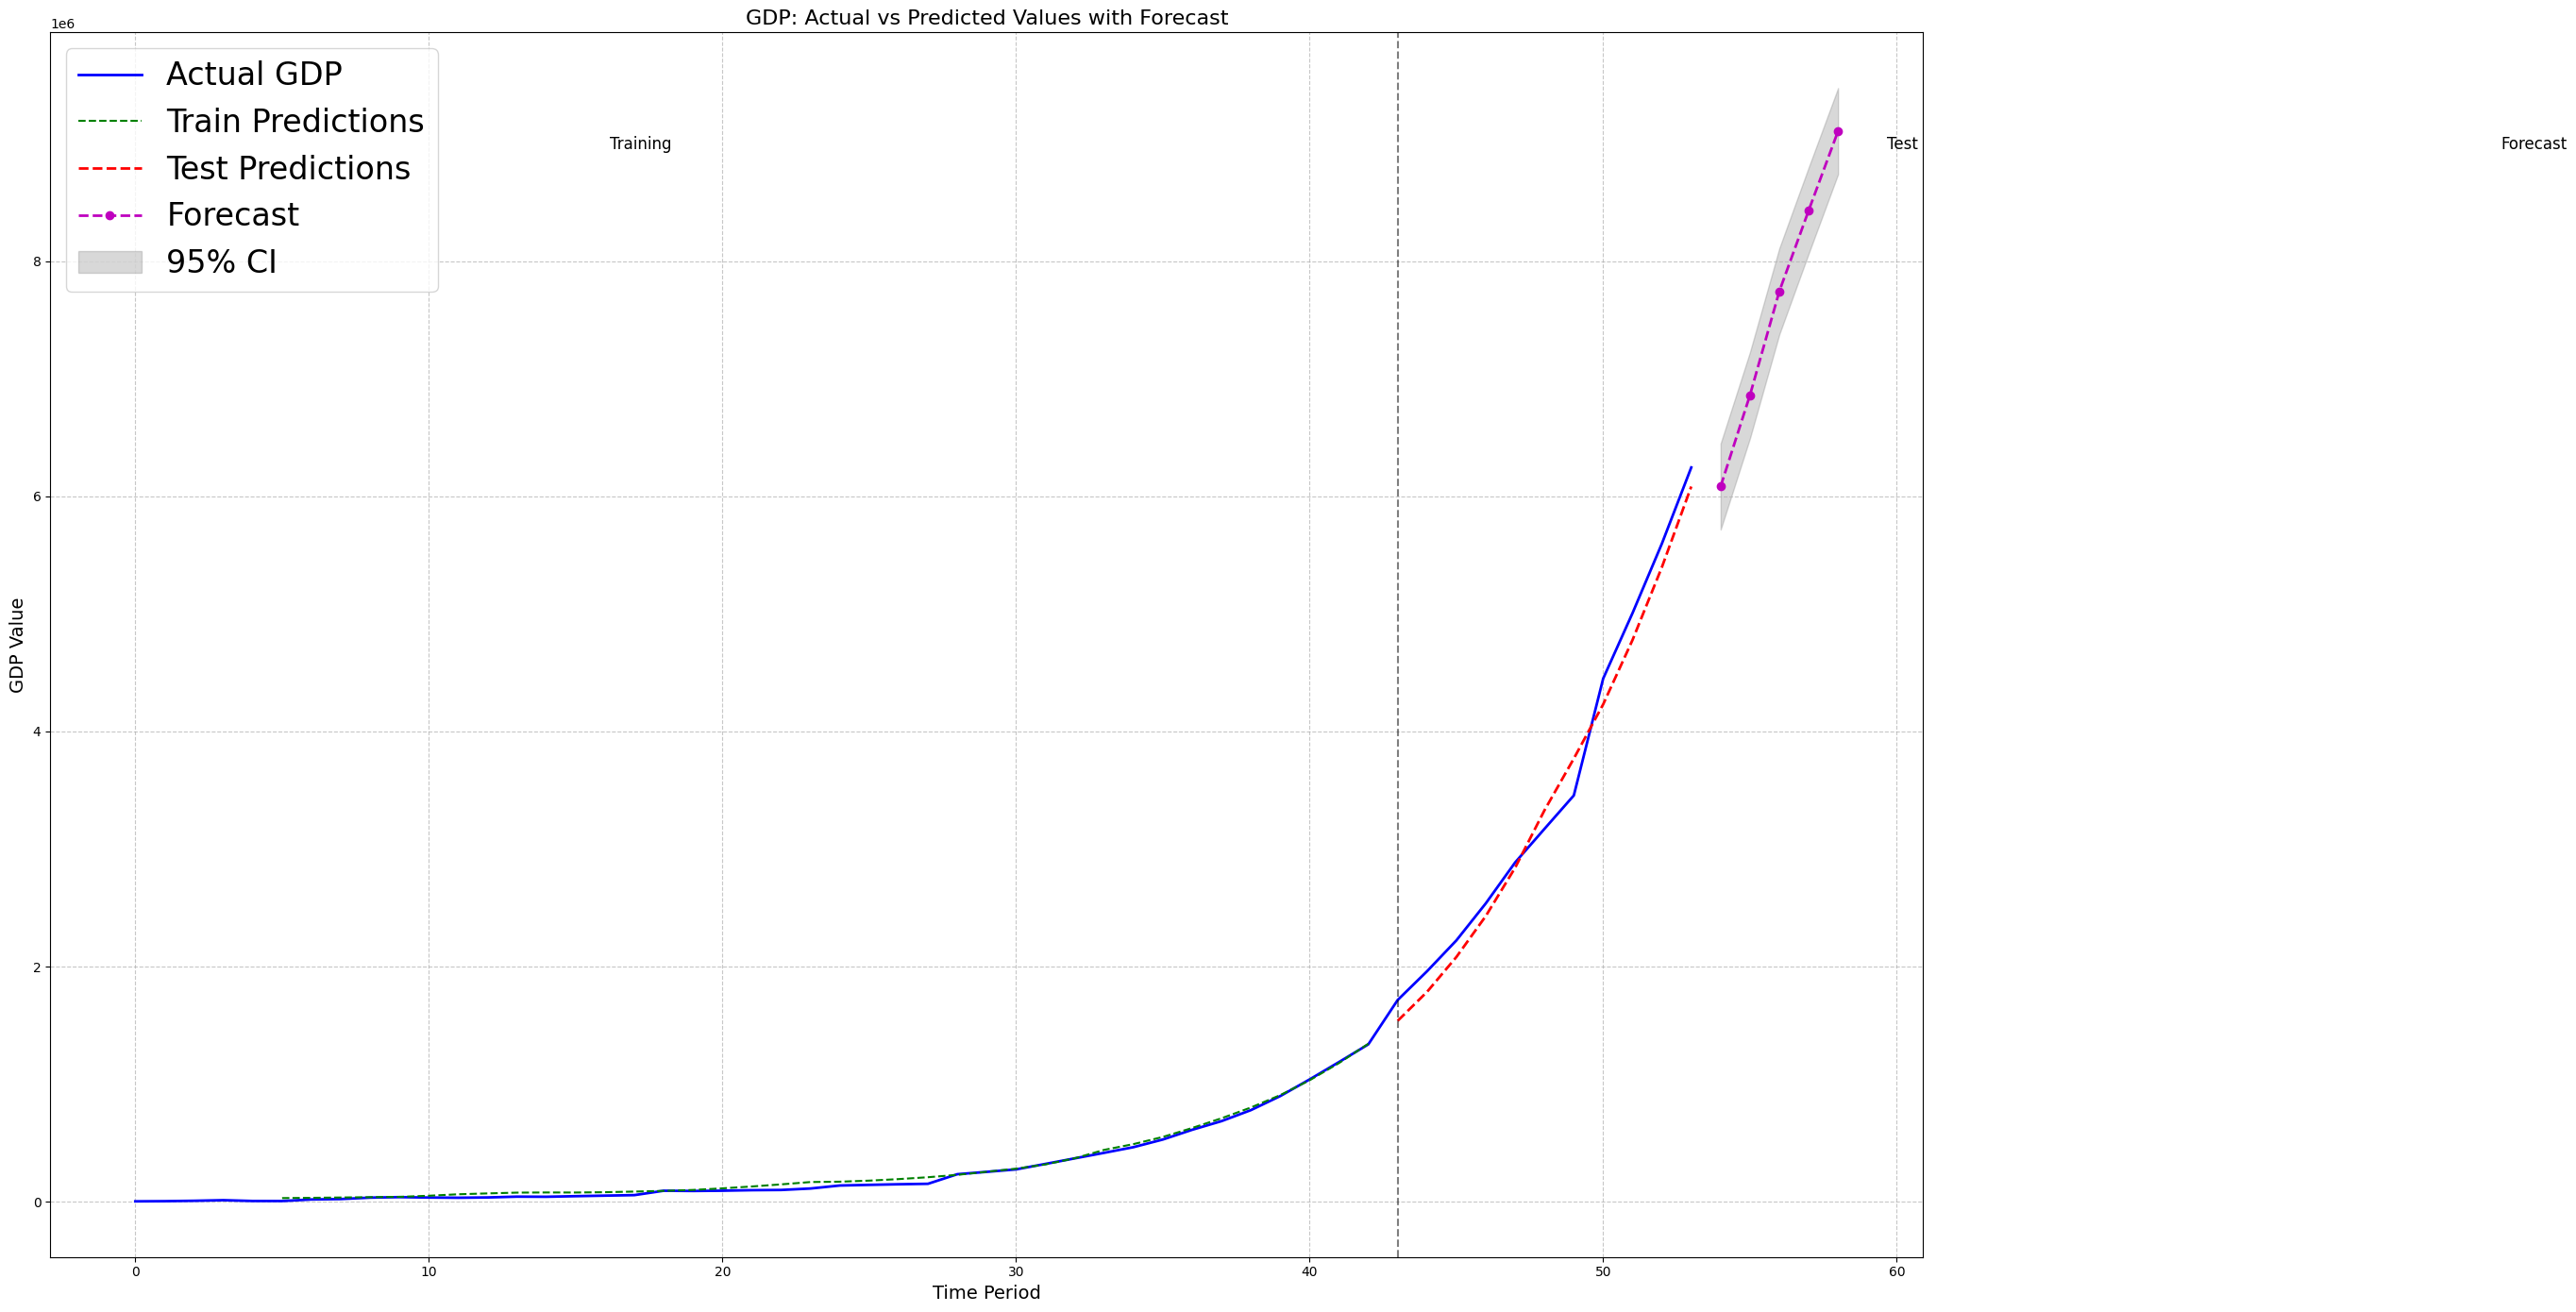

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
import pandas as pd

# Generate predictions for train and test sets
train_pred_scaled = best_model.predict(X_train)
train_pred = scaler.inverse_transform(train_pred_scaled).flatten()

# Calculate residuals and standard error
residuals = y_true - y_pred
std_error = np.std(residuals)
n = len(y_test)
dof = n - 1  # degrees of freedom
t_val = t.ppf(0.975, dof)  # 95% CI t-value

# Create forecast with confidence intervals
forecast_steps = 5  # Number of steps to forecast
last_sequence = X_test[-1:]  # Last known sequence

forecasts = []
lower_bounds = []
upper_bounds = []

current_sequence = last_sequence.copy()
for _ in range(forecast_steps):
    next_pred = best_model.predict(current_sequence)
    forecasts.append(scaler.inverse_transform(next_pred)[0][0])
    
    # Calculate confidence intervals
    margin_of_error = t_val * std_error
    lower_bounds.append(forecasts[-1] - margin_of_error)
    upper_bounds.append(forecasts[-1] + margin_of_error)
    
    # Update sequence (remove oldest, add prediction)
    current_sequence = np.append(current_sequence[:,1:,:], next_pred.reshape(1,1,1), axis=1)

# Prepare plot data
full_time = np.arange(len(gdp))
train_time = np.arange(best_time_steps, best_time_steps + len(train_pred))
test_time = np.arange(len(gdp_train), len(gdp_train) + len(y_pred))
forecast_time = np.arange(len(gdp), len(gdp) + forecast_steps)

# Create the plot
plt.figure(figsize=(28, 14))

# Plot actual values
plt.plot(full_time, gdp, 'b-', linewidth=2, label='Actual GDP')

# Plot training predictions
plt.plot(train_time, train_pred, 'g--', linewidth=1.5, label='Train Predictions')

# Plot test predictions
plt.plot(test_time, y_pred, 'r--', linewidth=2, label='Test Predictions')

# Plot forecast with confidence interval
plt.plot(forecast_time, forecasts, 'm--', linewidth=2, marker='o', label='Forecast')
plt.fill_between(forecast_time, lower_bounds, upper_bounds, 
                 color='gray', alpha=0.3, label='95% CI')

# Add vertical line separating train/test
plt.axvline(x=len(gdp_train), color='k', linestyle='--', alpha=0.5)

# Add labels and title
plt.title('GDP: Actual vs Predicted Values with Forecast', fontsize=16)
plt.xlabel('Time Period', fontsize=14)
plt.ylabel('GDP Value', fontsize=14)
plt.legend(fontsize=24, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Add text annotations
plt.text(len(gdp_train)*0.4, plt.ylim()[1]*0.9, "Training", ha='center', fontsize=12)
plt.text(len(gdp_train)*1.4, plt.ylim()[1]*0.9, "Test", ha='center', fontsize=12)
plt.text(len(gdp_train)*1.9, plt.ylim()[1]*0.9, "Forecast", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Setup seed for reproducibility
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Load data
file_path = r"C:\\Users\\P.Carbon\\Downloads\\Project-Budget\\Data3.csv"
df = pd.read_csv(file_path)
GDP = df['GDP'].values.astype(float)
years = df['Year'].values

# Train/test split
train_size = int(len(GDP) * 0.80)
GDP_train, GDP_test = GDP[:train_size], GDP[train_size:]

# Scale data
scaler = MinMaxScaler()
GDP_scaled = scaler.fit_transform(GDP.reshape(-1, 1))
train_scaled = GDP_scaled[:train_size]
test_scaled = GDP_scaled[train_size:]

# Prepare sequences for ANN (using previous 3 values to predict next)
def create_seq_ann(data, time_steps=3):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i].flatten())
        y.append(data[i])
    return np.array(X), np.array(y)

time_steps = 3
X, y = create_seq_ann(GDP_scaled, time_steps)
X_train, X_test = X[:train_size-time_steps], X[train_size-time_steps:]
y_train, y_test = y[:train_size-time_steps], y[train_size-time_steps:]

# Hyperparameters grid
units_list = [8, 16, 32, 64]
dropout_rates = [0.0, 0.1, 0.2]
batch_sizes = [8, 16]

results = []

for units in units_list:
    for dropout_rate in dropout_rates:
        for batch_size in batch_sizes:
            # Build model
            model = Sequential([
                Dense(units, activation='relu', input_shape=(time_steps,)),
                Dropout(dropout_rate),
                Dense(units, activation='relu'),
                Dropout(dropout_rate),
                Dense(1)
            ])
            model.compile(optimizer='adam', loss='mse')

            # Train
            early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
            model.fit(X_train, y_train, epochs=50, batch_size=batch_size,
                      validation_split=0.1, callbacks=[early_stop], verbose=0)

            # Predict and inverse scale
            y_pred_scaled = model.predict(X_test)
            y_pred = scaler.inverse_transform(y_pred_scaled).flatten()
            y_true = scaler.inverse_transform(y_test).flatten()

            # Metrics
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))
            mae = mean_absolute_error(y_true, y_pred)
            r2 = r2_score(y_true, y_pred)
            mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
            accuracy = 100 - mape

            results.append({
                'units': units,
                'dropout': dropout_rate,
                'batch_size': batch_size,
                'RMSE': rmse,
                'MAE': mae,
                'MAPE': mape,
                'Accuracy (%)': accuracy,
                'R2': r2
            })

# Find best model
best_model = min(results, key=lambda x: x['RMSE'])

print("\u2705 Best ANN Model:")
print(f"Units: {best_model['units']}, Dropout: {best_model['dropout']}, Batch size: {best_model['batch_size']}")
print(f"RMSE: {best_model['RMSE']:.4f}, MAE: {best_model['MAE']:.4f}")
print(f"MAPE (%): {best_model['MAPE']:.2f}, Accuracy (%): {best_model['Accuracy (%)']:.2f}")
print(f"R2 Score: {best_model['R2']:.4f}")



1/1 [==============================] - 0s 344ms/step
✅ Best ANN Model:
Units: 32, Dropout: 0.2, Batch size: 16
RMSE: 255017.1391, MAE: 202001.8409
MAPE (%): 6.20, Accuracy (%): 93.80
R2 Score: 0.9697


1/1 [==============================] - 6s 6s/step

📊 Final Evaluation: Hybrid ARIMA(2,2,3) + LSTM
✅ RMSE         : 90047.5182
✅ MAE          : 86602.2736
✅ MAPE (%)     : 13.45
✅ Accuracy (%) : 86.55
✅ R² Score     : 0.4300


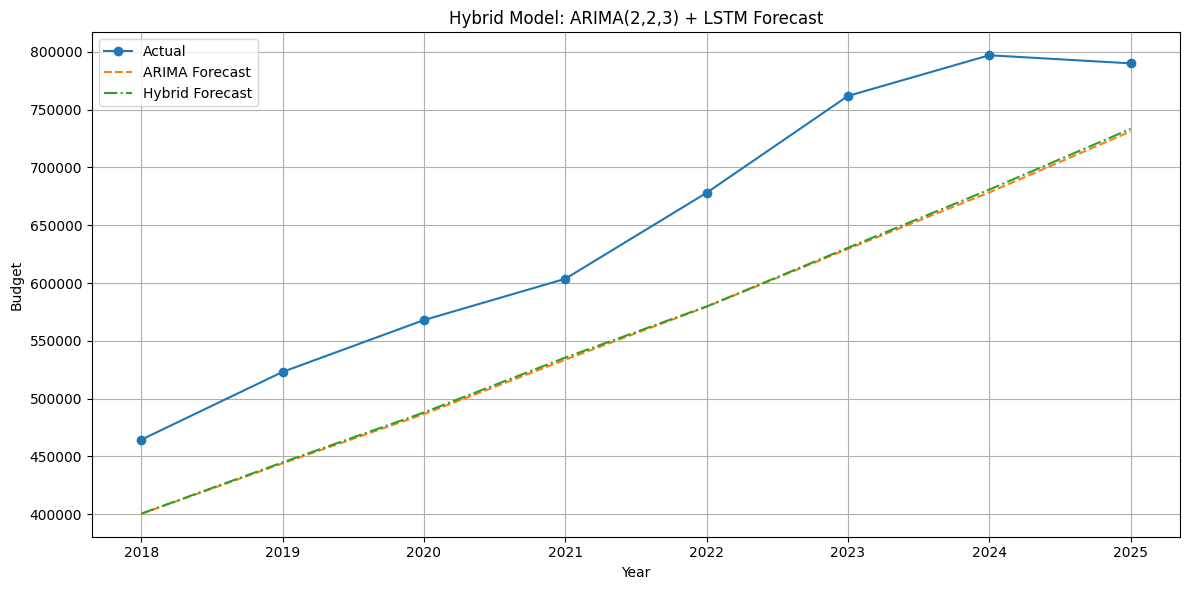

In [ ]:
import pandas as pd
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Setup
warnings.filterwarnings("ignore")
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Load data

budget = df['Budget'].values.astype(float)
years = df['Year'].values

# Split
total_size = len(budget)
train_size = int(total_size * 0.8)
budget_train, budget_test = budget[:train_size], budget[train_size:]
years_test = years[train_size:]

# Metrics
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def accuracy_from_mape(mape_val):
    return 100 - mape_val

# Best ARIMA(2,2,3)
order = (1, 2, 2)
best_arima_model = ARIMA(budget_train, order=order).fit()
arima_pred_test = best_arima_model.predict(start=train_size, end=total_size-1)
arima_resid_train = best_arima_model.resid

# LSTM config: time_steps=3, units=8, dropout=0.2, batch_size=8
scaler = MinMaxScaler()
budget_scaled = scaler.fit_transform(budget.reshape(-1, 1))

def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Hybrid ARIMA + LSTM on residuals
scaler_resid = MinMaxScaler()
resid_scaled = scaler_resid.fit_transform(arima_resid_train.reshape(-1, 1))
time_steps = 3
Xr, yr = create_sequences(resid_scaled, time_steps)
Xr_train = Xr[:int(len(Xr)*0.8)]
Xr_test = Xr[int(len(Xr)*0.8):]
yr_train = yr[:int(len(yr)*0.8)]
yr_test = yr[int(len(yr)*0.8):]

model_hybrid = Sequential([
    LSTM(8, return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(8),
    Dropout(0.2),
    Dense(1)
])
model_hybrid.compile(optimizer='adam', loss='mse')
model_hybrid.fit(Xr_train, yr_train, epochs=100, batch_size=8,
                 validation_split=0.1, callbacks=[EarlyStopping(patience=10, restore_best_weights=True)], verbose=0)

yr_pred_scaled = model_hybrid.predict(Xr_test)
yr_pred = scaler_resid.inverse_transform(yr_pred_scaled).flatten()
arima_last = best_arima_model.predict(start=train_size, end=total_size-1)
arima_part = arima_last[-len(yr_pred):]
hybrid_pred = arima_part + yr_pred
hybrid_true = budget[-len(hybrid_pred):]

# Hybrid Metrics
hybrid_rmse = np.sqrt(mean_squared_error(hybrid_true, hybrid_pred))
hybrid_mae = mean_absolute_error(hybrid_true, hybrid_pred)
hybrid_mape_val = mape(hybrid_true, hybrid_pred)
hybrid_r2 = r2_score(hybrid_true, hybrid_pred)
hybrid_acc = accuracy_from_mape(hybrid_mape_val)

# Print Results
print("\n\U0001F4CA Final Evaluation: Hybrid ARIMA(1,2,2) + LSTM")
print(f"\u2705 RMSE         : {hybrid_rmse:.4f}")
print(f"\u2705 MAE          : {hybrid_mae:.4f}")
print(f"\u2705 MAPE (%)     : {hybrid_mape_val:.2f}")
print(f"\u2705 Accuracy (%) : {hybrid_acc:.2f}")
print(f"\u2705 R² Score     : {hybrid_r2:.4f}")

# Optional Plot
plt.figure(figsize=(12, 6))
plt.plot(years_test[-len(hybrid_pred):], hybrid_true, label='Actual', marker='o')
plt.plot(years_test[-len(hybrid_pred):], arima_part, label='ARIMA Forecast', linestyle='--')
plt.plot(years_test[-len(hybrid_pred):], hybrid_pred, label='Hybrid Forecast', linestyle='-.')
plt.xlabel("Year")
plt.ylabel("Budget")
plt.title("Hybrid Model: ARIMA(2,2,3) + LSTM Forecast")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 320ms/step

📊 Final Evaluation: Hybrid ARIMA(2,2,3) + ANN
✅ RMSE         : 1336674.9430
✅ MAE          : 1165625.3214
✅ MAPE (%)     : 25.76
✅ Accuracy (%) : 74.24
✅ R² Score     : -0.1047


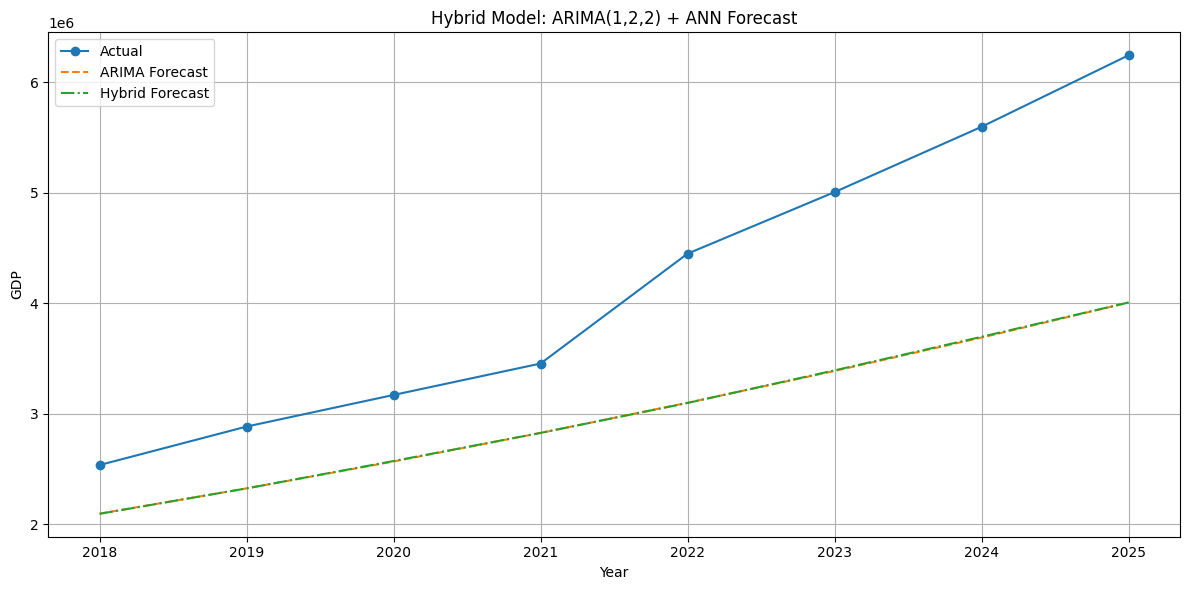

In [8]:
import pandas as pd
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Setup
warnings.filterwarnings("ignore")
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Load data

GDP = df['GDP'].values.astype(float)
years = df['Year'].values

# Split
total_size = len(GDP)
train_size = int(total_size * 0.8)
GDP_train, GDP_test = GDP[:train_size], GDP[train_size:]
years_test = years[train_size:]

# Metrics
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def accuracy_from_mape(mape_val):
    return 100 - mape_val

# Best ARIMA(1,2,2)
order = (1, 2, 2)
best_arima_model = ARIMA(GDP_train, order=order).fit()
arima_pred_test = best_arima_model.predict(start=train_size, end=total_size-1)
arima_resid_train = best_arima_model.resid

# ANN config: time_steps=3, units=64, dropout=0.2, batch_size=16
scaler = MinMaxScaler()
budget_scaled = scaler.fit_transform(budget.reshape(-1, 1))

def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Hybrid ARIMA + ANN on residuals
scaler_resid = MinMaxScaler()
resid_scaled = scaler_resid.fit_transform(arima_resid_train.reshape(-1, 1))
time_steps = 3
Xr, yr = create_sequences(resid_scaled, time_steps)
Xr_train = Xr[:int(len(Xr)*0.8)]
Xr_test = Xr[int(len(Xr)*0.8):]
yr_train = yr[:int(len(yr)*0.8)]
yr_test = yr[int(len(yr)*0.8):]

model_hybrid = Sequential([
    Dense(32, activation='relu', input_shape=(time_steps,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
model_hybrid.compile(optimizer='adam', loss='mse')
model_hybrid.fit(Xr_train, yr_train, epochs=100, batch_size=16,
                 validation_split=0.1, callbacks=[EarlyStopping(patience=10, restore_best_weights=True)], verbose=0)

yr_pred_scaled = model_hybrid.predict(Xr_test)
yr_pred = scaler_resid.inverse_transform(yr_pred_scaled).flatten()
arima_last = best_arima_model.predict(start=train_size, end=total_size-1)
arima_part = arima_last[-len(yr_pred):]
hybrid_pred = arima_part + yr_pred
hybrid_true = GDP[-len(hybrid_pred):]

# Hybrid Metrics
hybrid_rmse = np.sqrt(mean_squared_error(hybrid_true, hybrid_pred))
hybrid_mae = mean_absolute_error(hybrid_true, hybrid_pred)
hybrid_mape_val = mape(hybrid_true, hybrid_pred)
hybrid_r2 = r2_score(hybrid_true, hybrid_pred)
hybrid_acc = accuracy_from_mape(hybrid_mape_val)

# Print Results
print("\n\U0001F4CA Final Evaluation: Hybrid ARIMA(2,2,3) + ANN")
print(f"\u2705 RMSE         : {hybrid_rmse:.4f}")
print(f"\u2705 MAE          : {hybrid_mae:.4f}")
print(f"\u2705 MAPE (%)     : {hybrid_mape_val:.2f}")
print(f"\u2705 Accuracy (%) : {hybrid_acc:.2f}")
print(f"\u2705 R² Score     : {hybrid_r2:.4f}")

# Optional Plot
plt.figure(figsize=(12, 6))
plt.plot(years_test[-len(hybrid_pred):], hybrid_true, label='Actual', marker='o')
plt.plot(years_test[-len(hybrid_pred):], arima_part, label='ARIMA Forecast', linestyle='--')
plt.plot(years_test[-len(hybrid_pred):], hybrid_pred, label='Hybrid Forecast', linestyle='-.')
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("Hybrid Model: ARIMA(1,2,2) + ANN Forecast")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/100
3/3 [==============================] - 49s 4s/step - loss: 0.0016 - val_loss: 0.0228
Epoch 2/100
3/3 [==============================] - 1s 329ms/step - loss: 0.0010 - val_loss: 0.0171
Epoch 3/100
3/3 [==============================] - 0s 186ms/step - loss: 9.8498e-04 - val_loss: 0.0155
Epoch 4/100
3/3 [==============================] - 1s 241ms/step - loss: 0.0011 - val_loss: 0.0159
Epoch 5/100
3/3 [==============================] - 1s 213ms/step - loss: 9.5384e-04 - val_loss: 0.0164
Epoch 6/100
3/3 [==============================] - 1s 299ms/step - loss: 8.4817e-04 - val_loss: 0.0161
Epoch 7/100
3/3 [==============================] - 1s 276ms/step - loss: 8.2152e-04 - val_loss: 0.0160
Epoch 8/100
3/3 [==============================] - 1s 236ms/step - loss: 7.7538e-04 - val_loss: 0.0155
Epoch 9/100
3/3 [==============================] - 1s 305ms/step - loss: 7.9651e-04 - val_loss: 0.0153
Epoch 10/100
3/3 [==============================] - 1s 219ms/step - loss: 7.6677e-04 - 

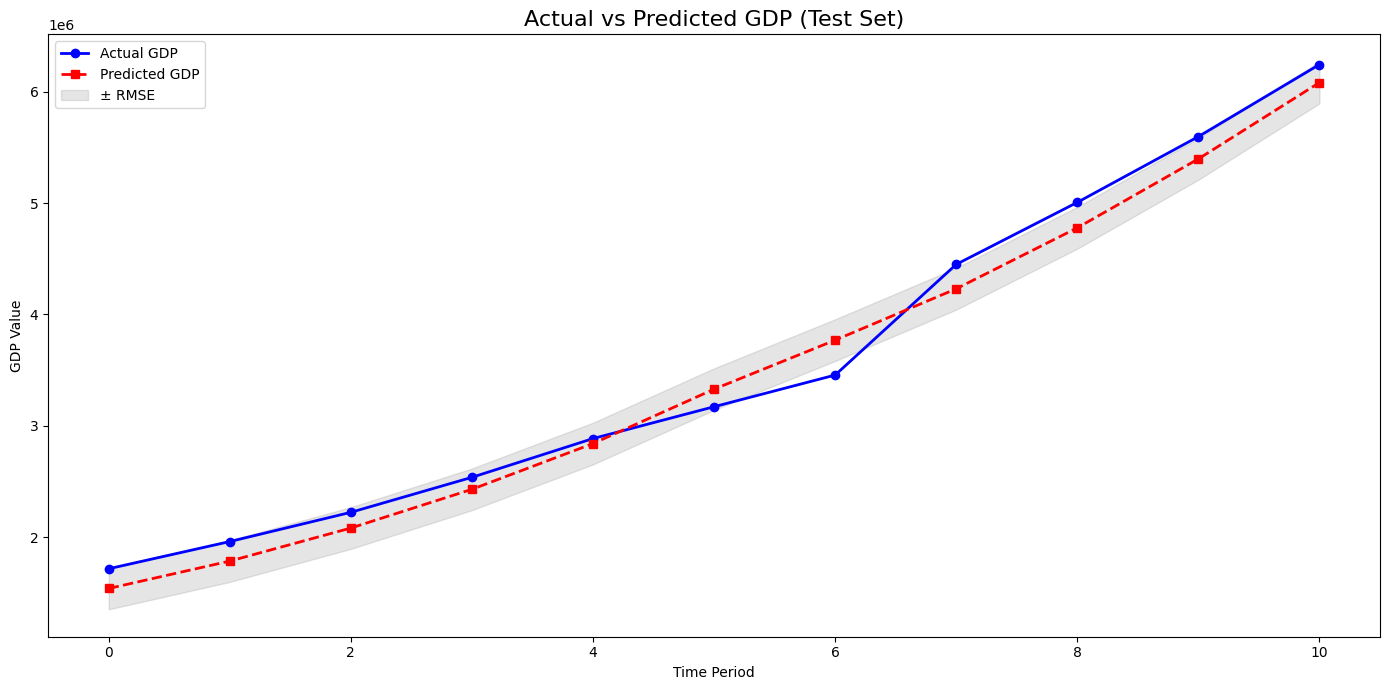

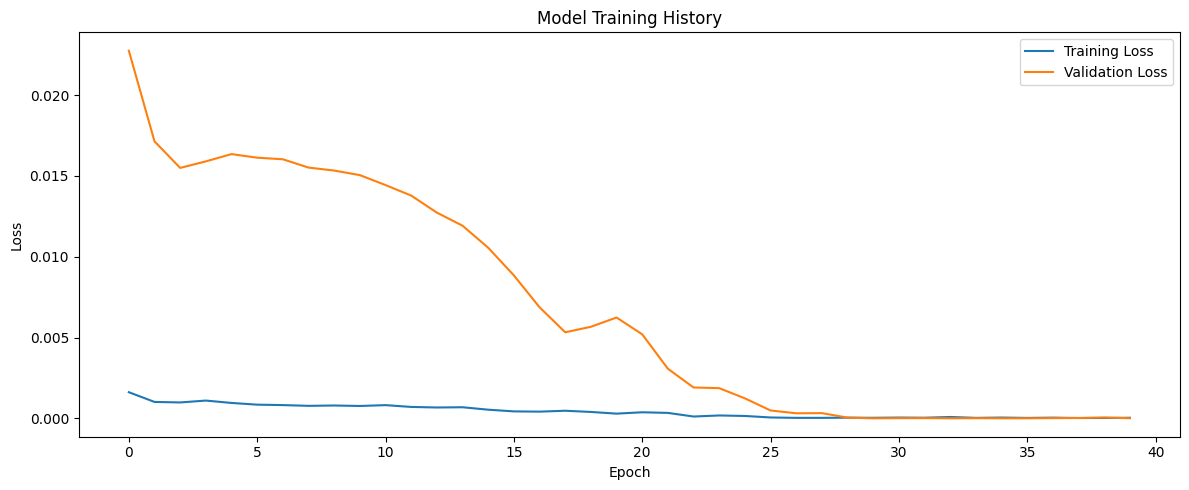

1/1 [==============================] - 0s 191ms/step


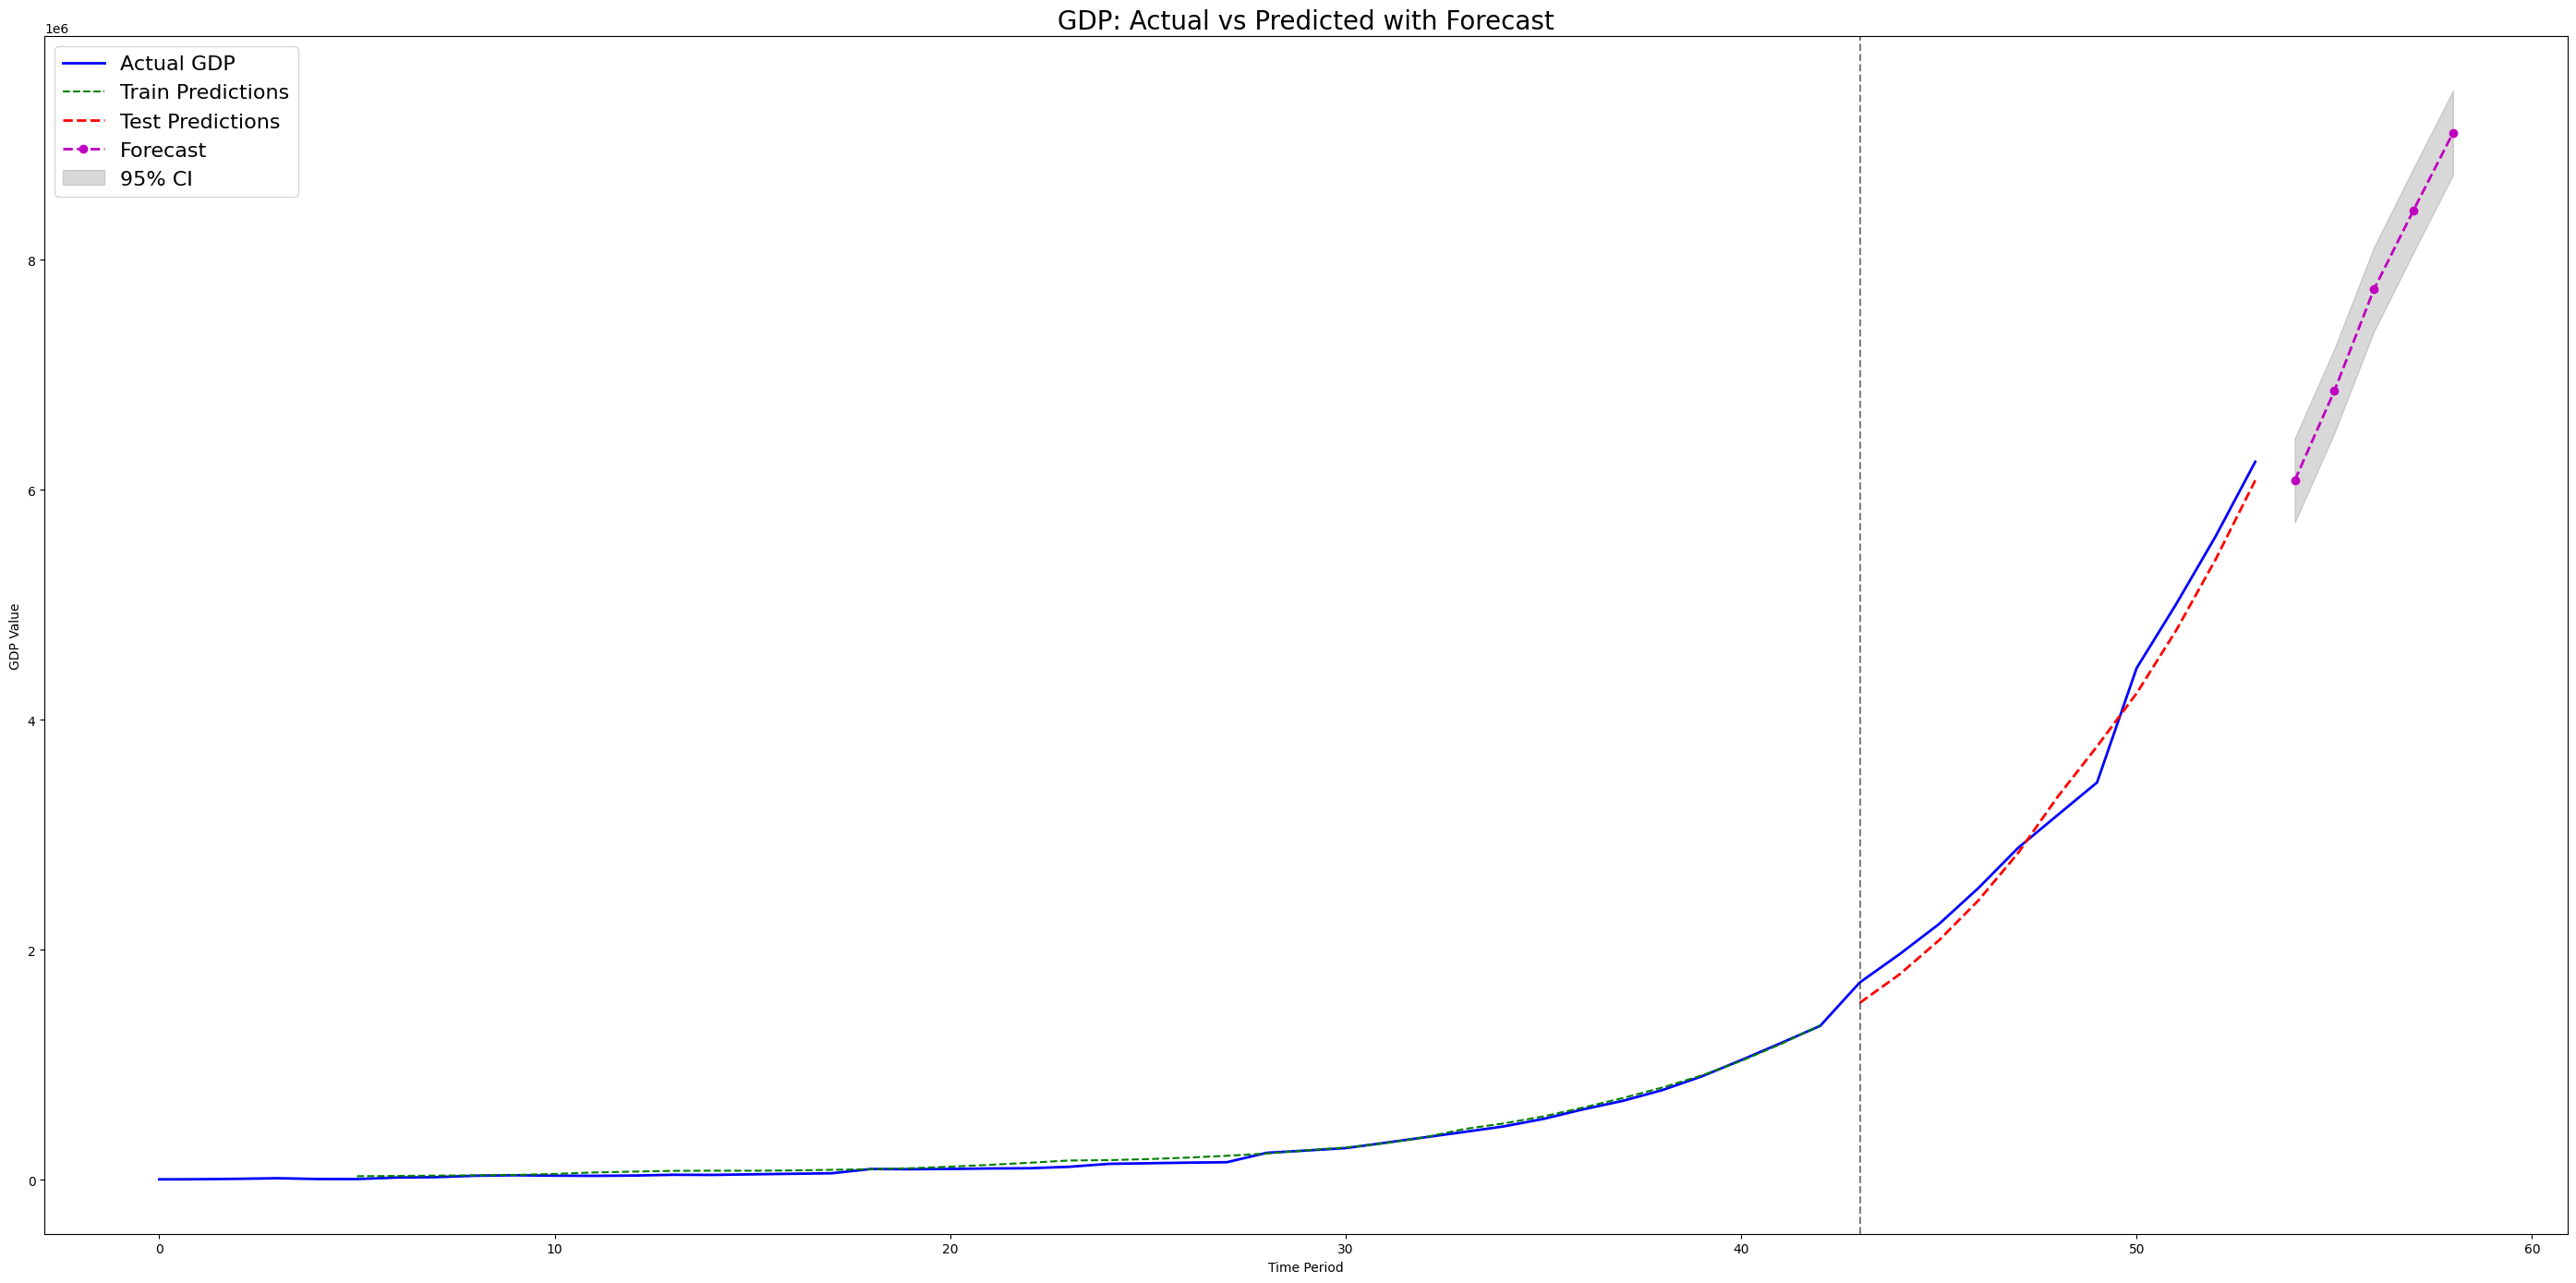


📊 Actual vs Predicted GDP (Test Set):
    Year  Actual_GDP  Predicted_GDP
0   2015   1716700.0    1539591.500
1   2016   1961017.0    1785647.250
2   2017   2223600.0    2082398.375
3   2018   2537849.0    2430080.000
4   2019   2885872.0    2840923.500
5   2020   3171800.0    3329404.250
6   2021   3456040.0    3769656.250
7   2022   4449959.0    4230922.500
8   2023   5006782.0    4778166.500
9   2024   5597414.0    5397110.000
10  2025   6244578.0    6082490.000

📈 Forecasted GDP for Next 5 Years with 95% CI:
   Year  Forecasted_GDP  Lower_95%_CI  Upper_95%_CI
0  2026       6082491.0    5716196.12    6448785.88
1  2027       6859652.0    6493357.12    7225946.88
2  2028       7742759.5    7376464.62    8109054.38
3  2029       8430321.0    8064026.12    8796615.88
4  2030       9104249.0    8737954.12    9470543.88


In [4]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats import t

# Suppress warnings
warnings.filterwarnings("ignore")

# Set seeds for reproducibility
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Load dataset
file_path = r"C:\Users\P.Carbon\Downloads\Project-Budget\Data3.csv"
df = pd.read_csv(file_path)

# Load GDP and Year
gdp = df['GDP'].values.astype(float)
years = df['Year'].values

# Split data
train_size = int(len(gdp) * 0.8)
gdp_train = gdp[:train_size]
gdp_test = gdp[train_size:]

# Normalize
scaler = MinMaxScaler()
gdp_scaled = scaler.fit_transform(gdp.reshape(-1, 1))

# Sequence generator
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Best parameters
best_time_steps = 5
best_units = 32
best_dropout = 0.2
best_batch_size = 16

# Create sequences
X, y = create_sequences(gdp_scaled, best_time_steps)
X_train, X_test = X[:train_size - best_time_steps], X[train_size - best_time_steps:]
y_train, y_test = y[:train_size - best_time_steps], y[train_size - best_time_steps:]

# Model
model = Sequential([
    LSTM(best_units, activation='tanh', return_sequences=True, input_shape=(best_time_steps, 1)),
    Dropout(best_dropout),
    LSTM(best_units, activation='tanh'),
    Dropout(best_dropout),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=best_batch_size,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# Predict test set
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled).flatten()
y_true = scaler.inverse_transform(y_test).flatten()

# Metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape_val = mape(y_true, y_pred)
accuracy = 100 - mape_val
r2 = r2_score(y_true, y_pred)

print("\n✅ Best Model Performance on Test Set:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape_val:.4f}%")
print(f"Accuracy: {accuracy:.4f}%")
print(f"R2 Score: {r2:.4f}")

# Plot actual vs predicted (test set)
time_index = range(len(y_true))
plt.figure(figsize=(14, 7))
plt.plot(time_index, y_true, 'b-', linewidth=2, marker='o', label='Actual GDP')
plt.plot(time_index, y_pred, 'r--', linewidth=2, marker='s', label='Predicted GDP')
plt.fill_between(time_index, y_pred - rmse, y_pred + rmse, color='gray', alpha=0.2, label='± RMSE')

plt.title('Actual vs Predicted GDP (Test Set)', fontsize=16)
plt.xlabel('Time Period')
plt.ylabel('GDP Value')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

# Predict training set for plotting
train_pred_scaled = model.predict(X_train)
train_pred = scaler.inverse_transform(train_pred_scaled).flatten()

# Forecast next 5 years
residuals = y_true - y_pred
std_error = np.std(residuals)
n = len(y_test)
dof = n - 1
t_val = t.ppf(0.975, dof)

forecast_steps = 5
last_sequence = X_test[-1:]

forecasts = []
lower_bounds = []
upper_bounds = []
current_sequence = last_sequence.copy()

for _ in range(forecast_steps):
    next_pred = model.predict(current_sequence)
    forecast = scaler.inverse_transform(next_pred)[0][0]
    forecasts.append(forecast)
    margin_of_error = t_val * std_error
    lower_bounds.append(forecast - margin_of_error)
    upper_bounds.append(forecast + margin_of_error)
    current_sequence = np.append(current_sequence[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)

# Plot full series with forecast
full_time = np.arange(len(gdp))
train_time = np.arange(best_time_steps, best_time_steps + len(train_pred))
test_time = np.arange(len(gdp_train), len(gdp_train) + len(y_pred))
forecast_time = np.arange(len(gdp), len(gdp) + forecast_steps)

plt.figure(figsize=(28, 14))
plt.plot(full_time, gdp, 'b-', linewidth=2, label='Actual GDP')
plt.plot(train_time, train_pred, 'g--', linewidth=1.5, label='Train Predictions')
plt.plot(test_time, y_pred, 'r--', linewidth=2, label='Test Predictions')
plt.plot(forecast_time, forecasts, 'm--', linewidth=2, marker='o', label='Forecast')
plt.fill_between(forecast_time, lower_bounds, upper_bounds, color='gray', alpha=0.3, label='95% CI')
plt.axvline(x=len(gdp_train), color='k', linestyle='--', alpha=0.5)

plt.title('GDP: Actual vs Predicted with Forecast', fontsize=20)
plt.xlabel('Time Period')
plt.ylabel('GDP Value')
plt.legend(fontsize=16)
plt.grid(False)

plt.tight_layout()
plt.show()

# =======================
# 📊 Table 1: Actual vs Predicted (Test)
# =======================
test_years = years[train_size:]
actual_vs_predicted_df = pd.DataFrame({
    'Year': test_years[-len(y_true):],
    'Actual_GDP': y_true,
    'Predicted_GDP': y_pred
})
print("\n📊 Actual vs Predicted GDP (Test Set):")
print(actual_vs_predicted_df.round(2))

# =======================
# 📈 Table 2: Forecast with 95% CI
# =======================
last_year = years[-1]
forecast_years = [last_year + i for i in range(1, forecast_steps + 1)]
forecast_df = pd.DataFrame({
    'Year': forecast_years,
    'Forecasted_GDP': forecasts,
    'Lower_95%_CI': lower_bounds,
    'Upper_95%_CI': upper_bounds
})
print("\n📈 Forecasted GDP for Next 5 Years with 95% CI:")
print(forecast_df.round(2))

# =======================
# 💾 Optional: Save as CSV
# =======================
# actual_vs_predicted_df.to_csv("actual_vs_predicted_gdp.csv", index=False)
# forecast_df.to_csv("forecast_next_5_years.csv", index=False)


In [1]:
import pandas as pd
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Setup
warnings.filterwarnings("ignore")
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# ==== Load dataset ====
file_path = r"C:\Users\P.Carbon\Downloads\Project-Budget\Data3.csv"
df = pd.read_csv(file_path)
GDP = df['GDP'].values.astype(float)
years = df['Year'].values

# ==== Train/Test split ====
total_size = len(GDP)
train_size = int(total_size * 0.8)
GDP_train, GDP_test = GDP[:train_size], GDP[train_size:]
years_test = years[train_size:]

# ==== Helper functions ====
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def accuracy_from_mape(mape_val):
    return 100 - mape_val

def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# ==== Parameter grids ====
p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 4)

time_steps_list = [2, 3]
units_list = [16, 32, 64]
dropout_rates = [0.1, 0.2]
batch_sizes = [8, 16]

results = []

# ==== Hybrid ARIMA + ANN loop ====
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                # Fit ARIMA on training set
                arima_model = ARIMA(GDP_train, order=(p, d, q)).fit()

                # Predict on full dataset to get residuals
                arima_pred_train = arima_model.predict(start=0, end=train_size - 1)
                residuals_train = GDP_train - arima_pred_train

                # Prepare test predictions from ARIMA
                arima_pred_test = arima_model.predict(start=train_size, end=total_size - 1)
                residuals_test = GDP_test - arima_pred_test

                for time_steps in time_steps_list:
                    # Scale residuals for ANN
                    scaler_resid = MinMaxScaler()
                    resid_scaled = scaler_resid.fit_transform(residuals_train.reshape(-1, 1))

                    # Create sequences from scaled residuals
                    Xr, yr = create_sequences(resid_scaled, time_steps)

                    # Align ANN training with ARIMA forecast period
                    Xr_train = Xr
                    yr_train = yr

                    for units in units_list:
                        for dropout_rate in dropout_rates:
                            for batch_size in batch_sizes:
                                # Build ANN model
                                model_hybrid = Sequential([
                                    Dense(units, activation='relu', input_shape=(time_steps,)),
                                    Dropout(dropout_rate),
                                    Dense(units, activation='relu'),
                                    Dropout(dropout_rate),
                                    Dense(1)
                                ])
                                model_hybrid.compile(optimizer='adam', loss='mse')
                                early_stop = EarlyStopping(patience=10, restore_best_weights=True)

                                # Fit ANN on residuals
                                model_hybrid.fit(
                                    Xr_train, yr_train,
                                    epochs=50,
                                    batch_size=batch_size,
                                    validation_split=0.1,
                                    callbacks=[early_stop],
                                    verbose=0
                                )

                                # Prepare residuals test set for ANN
                                resid_test_scaled = scaler_resid.transform(residuals_test.reshape(-1, 1))
                                Xr_test, _ = create_sequences(resid_test_scaled, time_steps)

                                # ANN residual predictions
                                ann_resid_pred_scaled = model_hybrid.predict(Xr_test, verbose=0)
                                ann_resid_pred = scaler_resid.inverse_transform(ann_resid_pred_scaled).flatten()

                                # Align lengths
                                arima_pred_test_adj = arima_pred_test[-len(ann_resid_pred):]
                                GDP_test_adj = GDP_test[-len(ann_resid_pred):]

                                # Hybrid prediction = ARIMA + ANN residual correction
                                hybrid_pred = arima_pred_test_adj + ann_resid_pred

                                # Metrics
                                hybrid_rmse = np.sqrt(mean_squared_error(GDP_test_adj, hybrid_pred))
                                hybrid_mae = mean_absolute_error(GDP_test_adj, hybrid_pred)
                                hybrid_mape_val = mape(GDP_test_adj, hybrid_pred)
                                hybrid_r2 = r2_score(GDP_test_adj, hybrid_pred)
                                hybrid_acc = accuracy_from_mape(hybrid_mape_val)

                                results.append({
                                    'ARIMA_order': (p, d, q),
                                    'time_steps': time_steps,
                                    'units': units,
                                    'dropout': dropout_rate,
                                    'batch_size': batch_size,
                                    'RMSE': hybrid_rmse,
                                    'MAE': hybrid_mae,
                                    'MAPE': hybrid_mape_val,
                                    'Accuracy (%)': hybrid_acc,
                                    'R2': hybrid_r2
                                })
            except Exception as e:
                continue

# ==== Convert to DataFrame and Show Top Models ====
results_df = pd.DataFrame(results)
top_5 = results_df.sort_values('MAPE').head(5)  # sort by MAPE for stability
print("\nTop 5 Hybrid Models (by MAPE):")
print(top_5.round(4))



Top 5 Hybrid Models (by MAPE):
    ARIMA_order  time_steps  units  dropout  batch_size         RMSE  \
441   (2, 0, 2)           2     64      0.1          16  198028.6780   
440   (2, 0, 2)           2     64      0.1           8  204277.4810   
448   (2, 0, 2)           3     32      0.1           8  197092.7103   
512   (2, 1, 1)           2     64      0.1           8  206466.1931   
520   (2, 1, 1)           3     32      0.1           8  221441.5725   

             MAE    MAPE  Accuracy (%)      R2  
441  128598.1142  3.0585       96.9415  0.9784  
440  129212.3642  3.1005       96.8995  0.9770  
448  142837.1494  3.2928       96.7072  0.9760  
512  140299.7500  3.3603       96.6397  0.9765  
520  143814.5938  3.4571       96.5429  0.9697  


In [ ]:
import pandas as pd
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# ==== Setup ====
warnings.filterwarnings("ignore")
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# ==== Load dataset ====
file_path = r"C:\Users\P.Carbon\Downloads\Project-Budget\Data3.csv"
df = pd.read_csv(file_path)
GDP = df['GDP'].values.astype(float)
years = df['Year'].values

# ==== Train/Test split ====
total_size = len(GDP)
train_size = int(total_size * 0.8)
GDP_train, GDP_test = GDP[:train_size], GDP[train_size:]
years_test = years[train_size:]

# ==== Helper functions ====
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def accuracy_from_mape(mape_val):
    return 100 - mape_val

def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

def build_ann(time_steps, units, dropout_rate):
    model = Sequential([
        Dense(units, activation='relu', input_shape=(time_steps,)),
        Dropout(dropout_rate),
        Dense(units, activation='relu'),
        Dropout(dropout_rate),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# ==== Search grids (kept compact for speed/robustness) ====
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

time_steps_list = [2, 3]
units_list = [32, 64]
dropout_rates = [0.1]
batch_sizes = [8, 16]

results = []

# ==== Grid search: ARIMA + ANN on residuals ====
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                arima_model = ARIMA(GDP_train, order=(p, d, q)).fit()

                # In-sample train residuals
                arima_pred_train = arima_model.predict(start=0, end=train_size-1)
                residuals_train = GDP_train - arima_pred_train

                # Out-of-sample ARIMA baseline for test
                arima_pred_test = arima_model.predict(start=train_size, end=total_size-1)
                residuals_test = GDP_test - arima_pred_test

                # Scale residuals for ANN
                for time_steps in time_steps_list:
                    scaler_resid = MinMaxScaler()
                    resid_scaled = scaler_resid.fit_transform(residuals_train.reshape(-1, 1))
                    Xr_train, yr_train = create_sequences(resid_scaled, time_steps)

                    for units in units_list:
                        for dropout_rate in dropout_rates:
                            for batch_size in batch_sizes:
                                try:
                                    ann = build_ann(time_steps, units, dropout_rate)
                                    early_stop = EarlyStopping(patience=10, restore_best_weights=True)

                                    ann.fit(
                                        Xr_train, yr_train,
                                        epochs=50,
                                        batch_size=batch_size,
                                        validation_split=0.1,
                                        callbacks=[early_stop],
                                        verbose=0
                                    )

                                    # Prepare test residual inputs
                                    resid_test_scaled = scaler_resid.transform(residuals_test.reshape(-1, 1))
                                    Xr_test, _ = create_sequences(resid_test_scaled, time_steps)

                                    if len(Xr_test) == 0:
                                        continue

                                    ann_resid_pred_scaled = ann.predict(Xr_test, verbose=0)
                                    ann_resid_pred = scaler_resid.inverse_transform(ann_resid_pred_scaled).flatten()

                                    # Align arrays
                                    arima_pred_test_adj = arima_pred_test[-len(ann_resid_pred):]
                                    GDP_test_adj = GDP_test[-len(ann_resid_pred):]

                                    # Hybrid = ARIMA + ANN residual
                                    hybrid_pred = arima_pred_test_adj + ann_resid_pred

                                    # Metrics
                                    rmse_val = np.sqrt(mean_squared_error(GDP_test_adj, hybrid_pred))
                                    mae_val = mean_absolute_error(GDP_test_adj, hybrid_pred)
                                    mape_val = mape(GDP_test_adj, hybrid_pred)
                                    acc_val = accuracy_from_mape(mape_val)
                                    r2_val = r2_score(GDP_test_adj, hybrid_pred)

                                    results.append({
                                        'ARIMA_order': (p, d, q),
                                        'time_steps': time_steps,
                                        'units': units,
                                        'dropout': dropout_rate,
                                        'batch_size': batch_size,
                                        'RMSE': rmse_val,
                                        'MAE': mae_val,
                                        'MAPE': mape_val,
                                        'Accuracy (%)': acc_val,
                                        'R2': r2_val,
                                        'log_RMSE': np.log(rmse_val),
                                        'log_MAE': np.log(mae_val)
                                    })
                                except Exception:
                                    continue
            except Exception:
                continue

results_df = pd.DataFrame(results).sort_values('MAPE').reset_index(drop=True)

if results_df.empty:
    raise RuntimeError("No models were successfully trained. Check data and parameter ranges.")

# ==== Report best model ====
best = results_df.iloc[0]
print("\n=== Best Hybrid Model (by MAPE) ===")
print(best[['ARIMA_order','time_steps','units','dropout','batch_size']])
print("\n=== Metrics on Test (aligned) ===")
# print(best[['RMSE','MAE','MAPE','Accuracy (%)','R2','log_RMSE','log_MAE']].round(6))

# (Optional) show top 5
print("\nTop 5 candidates:")
print(results_df.head(5).round(6)[['ARIMA_order','time_steps','units','dropout','batch_size','RMSE','MAE','MAPE','Accuracy (%)','R2','log_RMSE','log_MAE']])

# ==== Refit best hybrid on FULL series for future forecasting ====
bp, bd, bq = best['ARIMA_order']
b_time_steps = int(best['time_steps'])
b_units = int(best['units'])
b_dropout = float(best['dropout'])
b_batch = int(best['batch_size'])

# 1) ARIMA on full data
arima_full = ARIMA(GDP, order=(bp, bd, bq)).fit()

# 2) Residuals on full data (in-sample predictions over full history)
arima_full_pred = arima_full.predict(start=0, end=len(GDP)-1)
full_residuals = GDP - arima_full_pred

# 3) Train ANN on full residuals
scaler_full_resid = MinMaxScaler()
full_resid_scaled = scaler_full_resid.fit_transform(full_residuals.reshape(-1,1))
Xr_full, yr_full = create_sequences(full_resid_scaled, b_time_steps)

ann_full = build_ann(b_time_steps, b_units, b_dropout)
early_stop_full = EarlyStopping(patience=10, restore_best_weights=True)
ann_full.fit(
    Xr_full, yr_full,
    epochs=50,
    batch_size=b_batch,
    validation_split=0.1,
    callbacks=[early_stop_full],
    verbose=0
)

# ==== Evaluate hybrid on the test segment (to estimate ANN uncertainty) ====
# Recreate test hybrid (aligned) with best config using train/test split
arima_tt = ARIMA(GDP_train, order=(bp, bd, bq)).fit()
arima_tt_test = arima_tt.predict(start=train_size, end=total_size-1)
resid_tt_train = GDP_train - arima_tt.predict(start=0, end=train_size-1)

scaler_tt = MinMaxScaler()
resid_tt_scaled = scaler_tt.fit_transform(resid_tt_train.reshape(-1,1))
Xr_tt, yr_tt = create_sequences(resid_tt_scaled, b_time_steps)

ann_tt = build_ann(b_time_steps, b_units, b_dropout)
ann_tt.fit(Xr_tt, yr_tt, epochs=50, batch_size=b_batch, validation_split=0.1,
           callbacks=[EarlyStopping(patience=10, restore_best_weights=True)], verbose=0)

resid_tt_test = GDP_test - arima_tt_test
resid_tt_test_scaled = scaler_tt.transform(resid_tt_test.reshape(-1,1))
Xr_tt_test, _ = create_sequences(resid_tt_test_scaled, b_time_steps)

if len(Xr_tt_test) > 0:
    ann_tt_pred_scaled = ann_tt.predict(Xr_tt_test, verbose=0)
    ann_tt_pred = scaler_tt.inverse_transform(ann_tt_pred_scaled).flatten()
    arima_tt_test_adj = arima_tt_test[-len(ann_tt_pred):]
    GDP_test_adj = GDP_test[-len(ann_tt_pred):]
    hybrid_tt_pred = arima_tt_test_adj + ann_tt_pred
    hybrid_test_errors = GDP_test_adj - hybrid_tt_pred
    # ANN uncertainty proxy: std of hybrid errors
    ann_sigma = float(np.std(hybrid_test_errors, ddof=1)) if len(hybrid_test_errors) > 1 else float(np.std(hybrid_test_errors))
else:
    # Fallback if sequence too short
    ann_sigma = float(np.std(full_residuals, ddof=1))

# ==== Proper iterative 5-year forecast with CIs ====
future_horizon = 5
future_years = list(range(int(years[-1]) + 1, int(years[-1]) + 1 + future_horizon))

gdp_extended = GDP.copy()
last_seq = full_resid_scaled[-b_time_steps:].reshape(1, -1)

hyb_mean = []
hyb_lower = []
hyb_upper = []

for step in range(future_horizon):
    # Refit ARIMA on the extended series for 1-step-ahead forecast and its SE
    arima_step = ARIMA(gdp_extended, order=(bp, bd, bq)).fit()
    fc_obj = arima_step.get_forecast(steps=1)
    arima_mean = float(fc_obj.predicted_mean)
    arima_se = float(fc_obj.se_mean)  # std error of ARIMA mean forecast

    # ANN residual 1-step prediction (using last residual sequence)
    next_resid_scaled = ann_full.predict(last_seq, verbose=0)
    next_resid = float(scaler_full_resid.inverse_transform(next_resid_scaled)[0, 0])

    # Hybrid mean forecast
    hybrid_next = arima_mean + next_resid

    # Combine uncertainties (approx): sqrt(arima_se^2 + ann_sigma^2)
    # Assumes independence between ARIMA mean error and ANN residual error.
    total_se = np.sqrt(max(arima_se, 0.0)**2 + max(ann_sigma, 0.0)**2)
    z = 1.96  # 95% CI
    lower = hybrid_next - z * total_se
    upper = hybrid_next + z * total_se

    # Save
    hyb_mean.append(hybrid_next)
    hyb_lower.append(lower)
    hyb_upper.append(upper)

    # Update extended series and residual sequence for next step
    gdp_extended = np.append(gdp_extended, hybrid_next)

    new_resid = hybrid_next - arima_mean
    new_resid_scaled = scaler_full_resid.transform([[new_resid]])
    last_seq = np.append(last_seq[:, 1:], new_resid_scaled.reshape(1, -1), axis=1)

# ==== Output forecast table ====
forecast_df = pd.DataFrame({
    "Year": future_years,
    "Hybrid_Forecast": hyb_mean,
    "Lower_95_CI": hyb_lower,
    "Upper_95_CI": hyb_upper
})
print("\n=== Next 5-Year Hybrid Forecast with 95% CI ===")
print(forecast_df.round(4))

# ==== Plots ====
plt.figure(figsize=(10,5))
plt.plot(years, GDP, label="Historical GDP", marker='o')
# Recompute aligned test hybrid with best model for plot
if len(Xr_tt_test) > 0:
    plt.plot(years_test[-len(hybrid_tt_pred):], hybrid_tt_pred, label="Hybrid Test Predictions", marker='x')
plt.plot(forecast_df["Year"], forecast_df["Hybrid_Forecast"], label="Hybrid Future Forecast", marker='s', linestyle='--')
plt.fill_between(forecast_df["Year"], forecast_df["Lower_95_CI"], forecast_df["Upper_95_CI"], alpha=0.2, label="95% CI")
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Best Hybrid Model (ARIMA + ANN Residual): 5-Year Forecast with 95% CI')
plt.legend()
plt.grid(True)
plt.show()



=== Best Hybrid Model (by MAPE) ===
ARIMA_order    (0, 0, 0)
time_steps             2
units                 32
dropout              0.1
batch_size            16
Name: 0, dtype: object

=== Metrics on Test (aligned) ===


TypeError: Expected numeric dtype, got object instead.


Top 5 candidates:
  ARIMA_order  time_steps  units  dropout  batch_size           RMSE  \
0   (0, 0, 0)           2     32      0.1          16  202122.507917   
1   (2, 0, 2)           3     64      0.1           8  213221.875566   
2   (2, 1, 1)           3     64      0.1           8  206394.720746   
3   (2, 0, 2)           2     64      0.1          16  236938.943044   
4   (2, 1, 1)           2     64      0.1          16  236809.231202   

             MAE      MAPE  Accuracy (%)        R2   log_RMSE    log_MAE  
0  130050.237080  3.177648     96.822352  0.977446  12.216629  11.775676  
1  153823.631885  3.584835     96.415165  0.971891  12.270089  11.943562  
2  160922.750000  3.661898     96.338102  0.973662  12.237546  11.988680  
3  157068.487522  3.743066     96.256934  0.969007  12.375558  11.964437  
4  156734.972222  3.744881     96.255119  0.969041  12.375010  11.962312  

=== Next 5-Year Hybrid Forecast with 95% CI ===
   Year  Hybrid_Forecast   Lower_95_CI   Upper_95

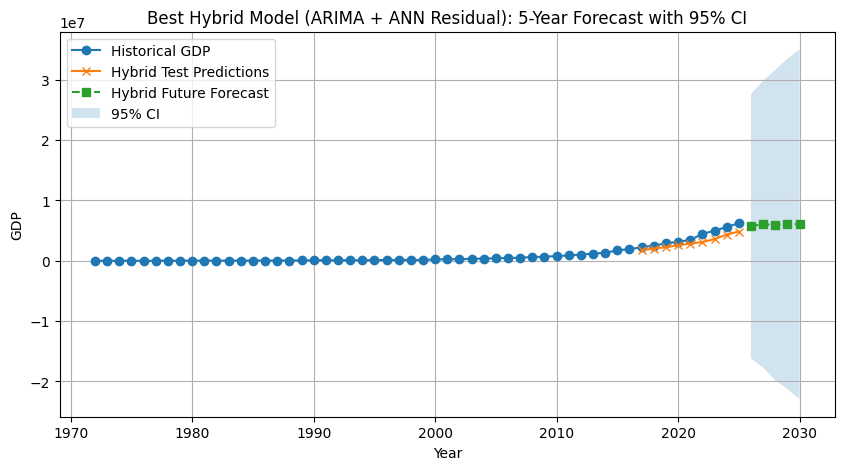

In [6]:
# (Optional) show top 5
print("\nTop 5 candidates:")
print(results_df.head(5).round(6)[['ARIMA_order','time_steps','units','dropout','batch_size','RMSE','MAE','MAPE','Accuracy (%)','R2','log_RMSE','log_MAE']])

# ==== Refit best hybrid on FULL series for future forecasting ====
bp, bd, bq = best['ARIMA_order']
b_time_steps = int(best['time_steps'])
b_units = int(best['units'])
b_dropout = float(best['dropout'])
b_batch = int(best['batch_size'])

# 1) ARIMA on full data
arima_full = ARIMA(GDP, order=(bp, bd, bq)).fit()

# 2) Residuals on full data (in-sample predictions over full history)
arima_full_pred = arima_full.predict(start=0, end=len(GDP)-1)
full_residuals = GDP - arima_full_pred

# 3) Train ANN on full residuals
scaler_full_resid = MinMaxScaler()
full_resid_scaled = scaler_full_resid.fit_transform(full_residuals.reshape(-1,1))
Xr_full, yr_full = create_sequences(full_resid_scaled, b_time_steps)

ann_full = build_ann(b_time_steps, b_units, b_dropout)
early_stop_full = EarlyStopping(patience=10, restore_best_weights=True)
ann_full.fit(
    Xr_full, yr_full,
    epochs=50,
    batch_size=b_batch,
    validation_split=0.1,
    callbacks=[early_stop_full],
    verbose=0
)

# ==== Evaluate hybrid on the test segment (to estimate ANN uncertainty) ====
# Recreate test hybrid (aligned) with best config using train/test split
arima_tt = ARIMA(GDP_train, order=(bp, bd, bq)).fit()
arima_tt_test = arima_tt.predict(start=train_size, end=total_size-1)
resid_tt_train = GDP_train - arima_tt.predict(start=0, end=train_size-1)

scaler_tt = MinMaxScaler()
resid_tt_scaled = scaler_tt.fit_transform(resid_tt_train.reshape(-1,1))
Xr_tt, yr_tt = create_sequences(resid_tt_scaled, b_time_steps)

ann_tt = build_ann(b_time_steps, b_units, b_dropout)
ann_tt.fit(Xr_tt, yr_tt, epochs=50, batch_size=b_batch, validation_split=0.1,
           callbacks=[EarlyStopping(patience=10, restore_best_weights=True)], verbose=0)

resid_tt_test = GDP_test - arima_tt_test
resid_tt_test_scaled = scaler_tt.transform(resid_tt_test.reshape(-1,1))
Xr_tt_test, _ = create_sequences(resid_tt_test_scaled, b_time_steps)

if len(Xr_tt_test) > 0:
    ann_tt_pred_scaled = ann_tt.predict(Xr_tt_test, verbose=0)
    ann_tt_pred = scaler_tt.inverse_transform(ann_tt_pred_scaled).flatten()
    arima_tt_test_adj = arima_tt_test[-len(ann_tt_pred):]
    GDP_test_adj = GDP_test[-len(ann_tt_pred):]
    hybrid_tt_pred = arima_tt_test_adj + ann_tt_pred
    hybrid_test_errors = GDP_test_adj - hybrid_tt_pred
    # ANN uncertainty proxy: std of hybrid errors
    ann_sigma = float(np.std(hybrid_test_errors, ddof=1)) if len(hybrid_test_errors) > 1 else float(np.std(hybrid_test_errors))
else:
    # Fallback if sequence too short
    ann_sigma = float(np.std(full_residuals, ddof=1))

# ==== Proper iterative 5-year forecast with CIs ====
future_horizon = 5
future_years = list(range(int(years[-1]) + 1, int(years[-1]) + 1 + future_horizon))

gdp_extended = GDP.copy()
last_seq = full_resid_scaled[-b_time_steps:].reshape(1, -1)

hyb_mean = []
hyb_lower = []
hyb_upper = []

for step in range(future_horizon):
    # Refit ARIMA on the extended series for 1-step-ahead forecast and its SE
    arima_step = ARIMA(gdp_extended, order=(bp, bd, bq)).fit()
    fc_obj = arima_step.get_forecast(steps=1)
    arima_mean = float(fc_obj.predicted_mean)
    arima_se = float(fc_obj.se_mean)  # std error of ARIMA mean forecast

    # ANN residual 1-step prediction (using last residual sequence)
    next_resid_scaled = ann_full.predict(last_seq, verbose=0)
    next_resid = float(scaler_full_resid.inverse_transform(next_resid_scaled)[0, 0])

    # Hybrid mean forecast
    hybrid_next = arima_mean + next_resid

    # Combine uncertainties (approx): sqrt(arima_se^2 + ann_sigma^2)
    # Assumes independence between ARIMA mean error and ANN residual error.
    total_se = np.sqrt(max(arima_se, 0.0)**2 + max(ann_sigma, 0.0)**2)
    z = 1.96  # 95% CI
    lower = hybrid_next - z * total_se
    upper = hybrid_next + z * total_se

    # Save
    hyb_mean.append(hybrid_next)
    hyb_lower.append(lower)
    hyb_upper.append(upper)

    # Update extended series and residual sequence for next step
    gdp_extended = np.append(gdp_extended, hybrid_next)

    new_resid = hybrid_next - arima_mean
    new_resid_scaled = scaler_full_resid.transform([[new_resid]])
    last_seq = np.append(last_seq[:, 1:], new_resid_scaled.reshape(1, -1), axis=1)

# ==== Output forecast table ====
forecast_df = pd.DataFrame({
    "Year": future_years,
    "Hybrid_Forecast": hyb_mean,
    "Lower_95_CI": hyb_lower,
    "Upper_95_CI": hyb_upper
})
print("\n=== Next 5-Year Hybrid Forecast with 95% CI ===")
print(forecast_df.round(4))

# ==== Plots ====
plt.figure(figsize=(10,5))
plt.plot(years, GDP, label="Historical GDP", marker='o')
# Recompute aligned test hybrid with best model for plot
if len(Xr_tt_test) > 0:
    plt.plot(years_test[-len(hybrid_tt_pred):], hybrid_tt_pred, label="Hybrid Test Predictions", marker='x')
plt.plot(forecast_df["Year"], forecast_df["Hybrid_Forecast"], label="Hybrid Future Forecast", marker='s', linestyle='--')
plt.fill_between(forecast_df["Year"], forecast_df["Lower_95_CI"], forecast_df["Upper_95_CI"], alpha=0.2, label="95% CI")
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Best Hybrid Model (ARIMA + ANN Residual): 5-Year Forecast with 95% CI')
plt.legend()
plt.grid(True)
plt.show()
